<a href="https://colab.research.google.com/github/JasLieb/IML/blob/master/TP4/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [28]:
X = cancer.data
y = cancer.target
X,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)*100
print("Model accuracy : %", acc)

Model accuracy : % 95.17543859649122


In [56]:
def evaluateK():
  iterations = range(20)
  acc_list = np.zeros(len(iterations))
  err_list = np.zeros(len(iterations))
  y_predList = np.zeros((len(iterations), len(X_test)))

  for i in iterations:
    clf = KNeighborsClassifier(n_neighbors=(i+1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_list[i] = accuracy_score(y_true=y_test, y_pred=y_pred)
    err_list[i] = np.sum(y_test != y_pred)/len(y_test)
    y_predList[i,:] = y_pred
  return acc_list, y_predList, err_list

acc_list, y_predList, err_list = evaluateK()
acc_list, y_predList, err_list

(array([0.94298246, 0.91666667, 0.93859649, 0.93421053, 0.95614035,
        0.96052632, 0.97368421, 0.96929825, 0.97807018, 0.98245614,
        0.97807018, 0.97368421, 0.97368421, 0.97807018, 0.97368421,
        0.97368421, 0.97368421, 0.97368421, 0.96491228, 0.96929825]),
 array([[1., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        ...,
        [1., 0., 0., ..., 1., 0., 1.],
        [1., 0., 0., ..., 1., 0., 1.],
        [1., 0., 0., ..., 1., 0., 1.]]),
 array([0.05701754, 0.08333333, 0.06140351, 0.06578947, 0.04385965,
        0.03947368, 0.02631579, 0.03070175, 0.02192982, 0.01754386,
        0.02192982, 0.02631579, 0.02631579, 0.02192982, 0.02631579,
        0.02631579, 0.02631579, 0.02631579, 0.03508772, 0.03070175]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


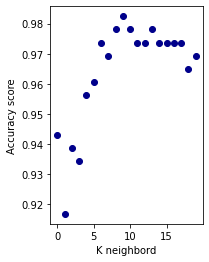

In [66]:
for i in range(20):
  ax = plt.subplot(1,2,1)
  ax.scatter(i, acc_list[i], c='DarkBlue')
  ax.set_adjustable('datalim', share=False)

plt.xlabel('K neighbord')
plt.ylabel('Accuracy score')
plt.plot();